# Algorytm Christofidesa–Serdykuova

Algorytm Christofidesa–Serdykuova jest algorytmem z ograniczeniem względnym $\frac{3}{2}$ znajdującym przybliżone rozwiązanie problemu komiwojażera dla grafu $G$.
1. Zbuduj minimalne drzewo spinające $T$ na $G$;
2. dla podgrafu $G$ indukowanego przez wierzchołki stopnia nieparzystego w $T$ znajdź najtańsze skojarzenie doskonałe $M$;
3. wyznacz obchód Eulera w multigrafie $H$ powstałym przed dodanie krawędzi $M$ do drzewa $T$;
4. zwróć cykl Hamiltona powstały przez usunięcie powtarzających się wierzchołków w obchodzie Eulera.

Poniżej tworzenie grafu losowego.

In [82]:
import networkx as nx

n = 10                  
G = nx.complete_graph(n)

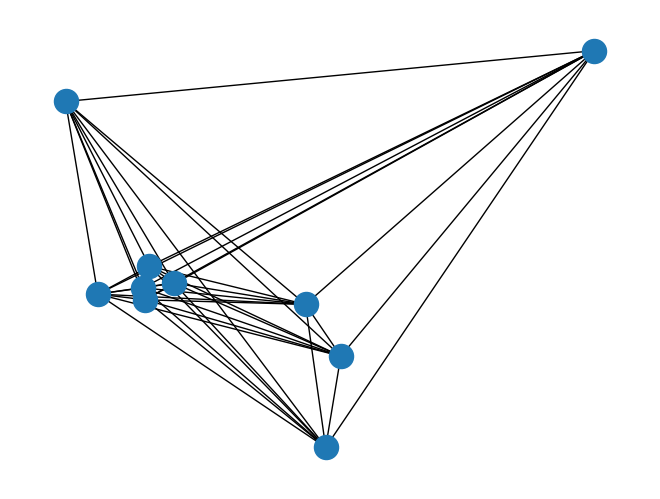

In [83]:
import random

my_pos = {i: (random.random(), random.random()) for i in G.nodes}
nx.draw(G, pos=my_pos)

Krawędziom nadajemy wagi zgodnie z położeniem wierzchołków na płaszczyźnie.

In [84]:
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

W kolejnym kroku tworzymy minimalne drzewo spinające – będzie on szkieletem ostatecznego cyklu Hamiltona.

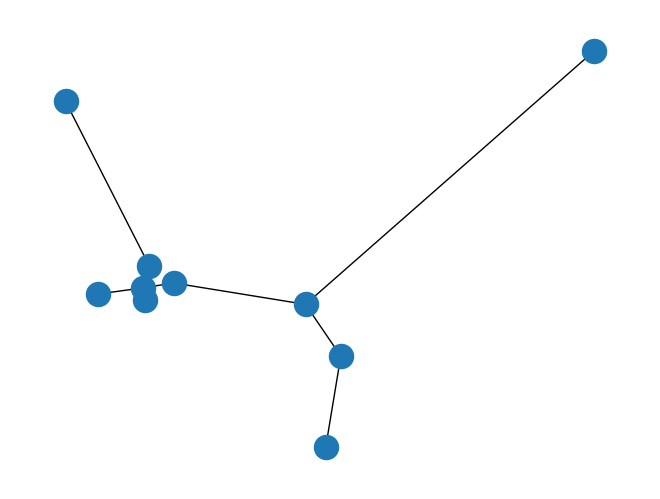

In [85]:
T = nx.minimum_spanning_tree(G,weight='length')
nx.draw(T, pos=my_pos)

Zauważmy, że każdy każdy wierzchołek w cyklu Hamiltona ma stopień 2 (jedna krawędź wchodzi, druga wychodzi).\
Z tego powodu identyfikujemy wierzchołki o stopniu nieparzystym, które następnie poprawimy.

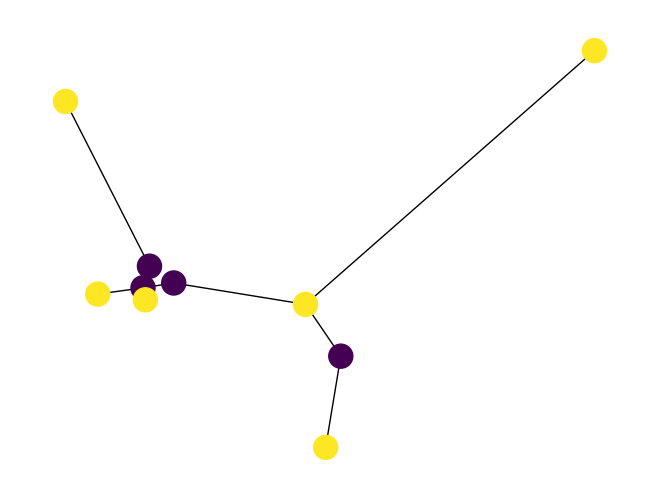

In [86]:
odd_degree_nodes = [ i for i in T.nodes if T.degree(i) % 2 ]
node_colors = [ T.degree(i) % 2 for i in T.nodes ]
nx.draw(T, pos=my_pos, node_color=node_colors)

Między wierzchołkami o stopniu nieparzystym znajdujemy teraz skojarzenie doskonałe o minimalnej wadze.

In [87]:
matching = nx.min_weight_matching(G.subgraph(odd_degree_nodes), weight='length')
print(matching)

{(2, 7), (9, 8), (1, 4)}


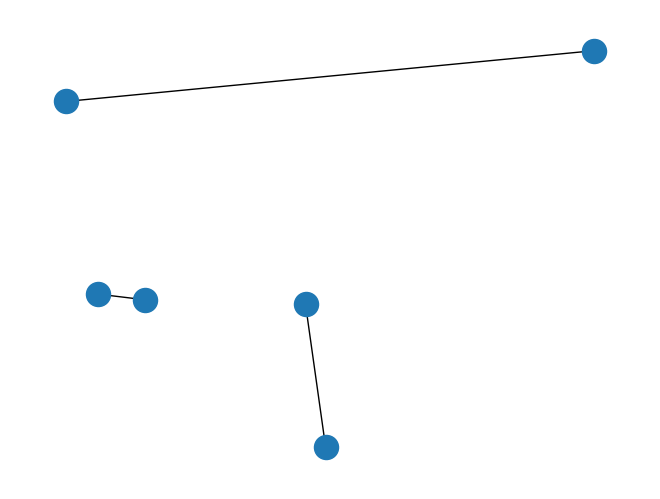

In [88]:
nx.draw(G.edge_subgraph(matching),pos=my_pos)

Znalezione krawędzie ze skojarzenia doskonałego dodajemy do grafu (może powstać multigraf).

In [89]:
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

print(M.edges())

[(0, 8), (0, 6), (0, 3), (0, 9), (1, 5), (1, 4), (2, 3), (2, 7), (4, 5), (4, 6), (4, 7), (8, 9)]


Z multigrafu tworzymy cykl Eulera.

In [90]:
initial_tour = list(nx.eulerian_circuit(M,source=0))
print(initial_tour)

[(0, 3), (3, 2), (2, 7), (7, 4), (4, 5), (5, 1), (1, 4), (4, 6), (6, 0), (0, 9), (9, 8), (8, 0)]


Usuwamy zbędne krawędzie z cyklu Eulera, by otrzymać cykl Hamiltona. Na przykład:
> A -> B -> A -> C => A -> B -> C

In [91]:
tour = [0]
for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
print(tour)

[0, 3, 2, 7, 4, 5, 1, 6, 9, 8]


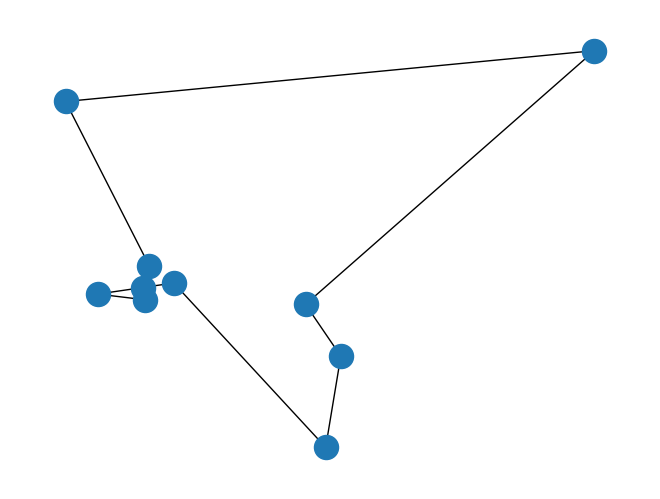

In [92]:
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)